# Datasets and Dataloaders

In [1]:
# importing MNIST dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root = "data/mnist",
    train = True, 
    download= True, 
    transform= ToTensor()
)

testing_data = datasets.FashionMNIST(
    root = "data/mnist",
    train = False, 
    download= True, 
    transform= ToTensor()
)

In [3]:
labels_map = {
    0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot",
}

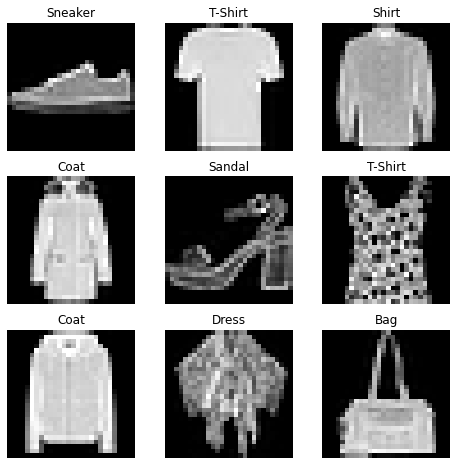

In [4]:
figure = plt.figure(figsize=(8, 8))

cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    random_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[random_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
# Custom Image Dataset

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):

    def __init__ (self, annotations_file, img_dir, transform=None, target_transform=None):
        '''
        annotations_file -> csv containing the labels
        img_dir -> directory where the files are stored
        '''
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[index, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[index, 1]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

In [6]:
# DataLoader

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 16, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size = 16, shuffle=True)

In [7]:
#### understanding next(iter())
lst = ["apple", "beer", "ice"]
lst_iter = iter(lst) # iterator object
print(lst_iter)
print(next(lst_iter))
print(next(lst_iter))
print(next(lst_iter))

# o iter cria um objeto iterável e o next aponta para o próximo valor do objeto

apple
beer
ice


Feature batch shape: torch.Size([16, 1, 28, 28])
Labels batch shape: torch.Size([16])


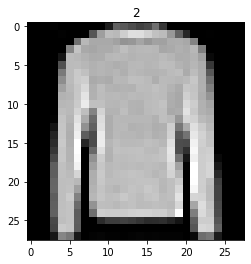

In [8]:
# Não entendi o next iter ^^^ explicado acima
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze() # remove dimensions with size 1
label = train_labels[0]

plt.imshow(img, cmap = 'gray')
plt.title(label.item())
plt.show()

Feature batch shape: torch.Size([16, 1, 28, 28])
Labels batch shape: torch.Size([16])


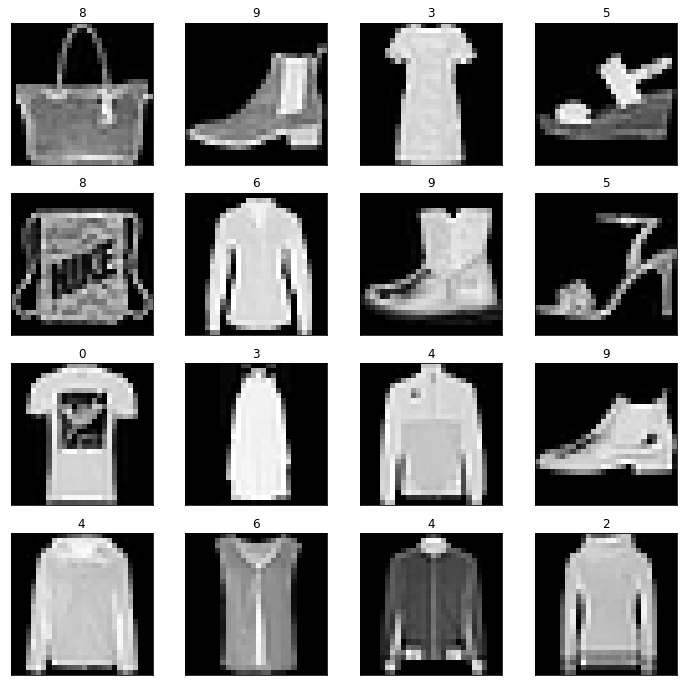

In [21]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

batch_len = train_features.size()[0]

plt.figure(figsize=(12,12))

for i in range(batch_len):
    img = train_features[i].squeeze() # remove dimensions with size 1
    label = train_labels[i]
    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label.item())
    plt.yticks([])
    plt.xticks([])

plt.show()

10